In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#from google.colab import files
#uploaded = files.upload()

NameError: ignored

#Carregando o data set e descobrindo suas características

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace = True)

# Realizando tratamento de atributos categóricos

In [15]:
# Label Encoder para transformar as variáveis categóricas utilizada quando a ordem dos valores não importa ou não é relevante para o modelo de aprendizado de máquina.
le = LabelEncoder()

In [16]:
object_list = []
for i in df.columns:
    if df[i].dtype == 'object':
        le.fit(df[i])
        df[i] = le.transform(df[i])

In [18]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [21]:
# Original Encoder leva em consideração a ordem dos valores categóricos. Essa técnica é útil quando os valores categóricos têm uma relação de ordem natural entre si
df[['sex','smoker','region']] = OrdinalEncoder().fit_transform(df[['sex','smoker','region']])

In [22]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
5,31,0.0,25.740,0,0.0,2.0,3756.62160
6,46,0.0,33.440,1,0.0,2.0,8240.58960
7,37,0.0,27.740,3,0.0,1.0,7281.50560
8,37,1.0,29.830,2,0.0,0.0,6406.41070
9,60,0.0,25.840,0,0.0,1.0,28923.13692


<Axes: >

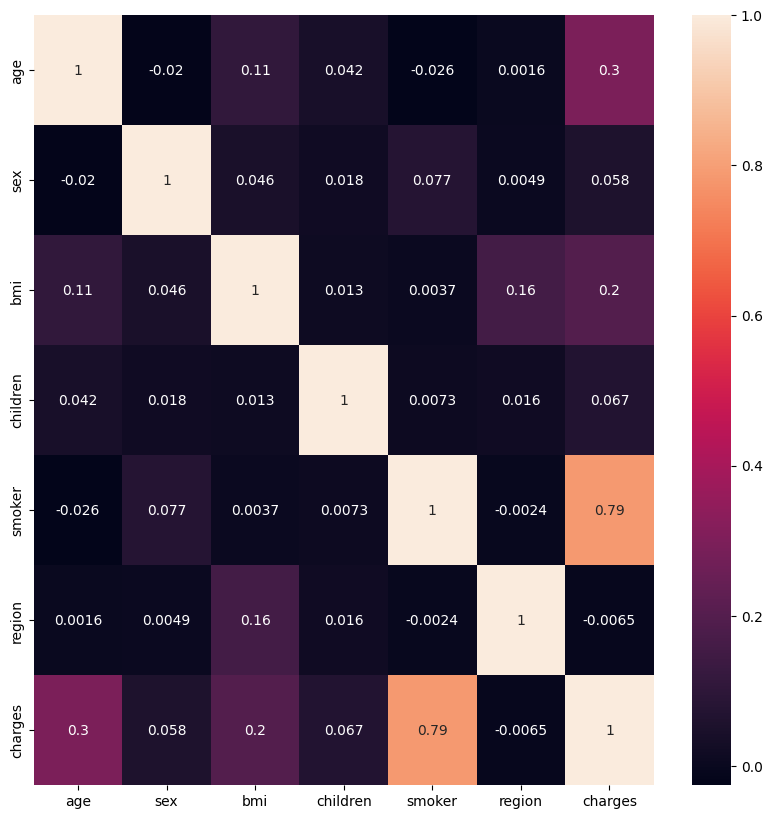

In [24]:
# Verificando a correlação das variáveis
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot=True)

# Inicializando o tratamento de variáveis dependentes e independentes e treinando o modelo

In [25]:
X = df.iloc[:, :-1]
X

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [27]:
y = df.iloc[:,-1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [29]:
# Utilizando Standard Scaler para calcular a média e o desvio padrão em um conjunto de treinamento,
# de modo a poder reaplicar posteriormente a mesma transformação no conjunto de teste
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
predictions = lr.predict(X_test)

In [32]:
import sklearn.metrics as sm
print('Root Mean Square Error: ',round(np.sqrt(np.mean(predictions -y_test)**2),2))
print('Mean Square Error:', round(sm.mean_squared_error(y_test, predictions ),2))
print('Mean Absolut Error:', round(sm.mean_absolute_error(y_test, predictions ),2))
print('Median Absolut Error:', round(sm.median_absolute_error(y_test, predictions ),2))
print('Explain Variance Score:', round(sm.explained_variance_score(y_test, predictions)*100,2))
print('R2 score:', round(sm.r2_score(y_test, predictions)*100,2))

Root Mean Square Error:  567.45
Mean Square Error: 35314269.22
Mean Absolut Error: 4144.82
Median Absolut Error: 2927.2
Explain Variance Score: 76.15
R2 score: 75.93


### Encontrando onde a regressão linear intercepta o eixo Y e o coeficiente angular

In [47]:
lr.intercept_

13421.302914709582

In [45]:
lr.coef_

array([3539.36355507, 2096.35303589, 9605.079979  ])

Text(0, 0.5, 'Predictions')

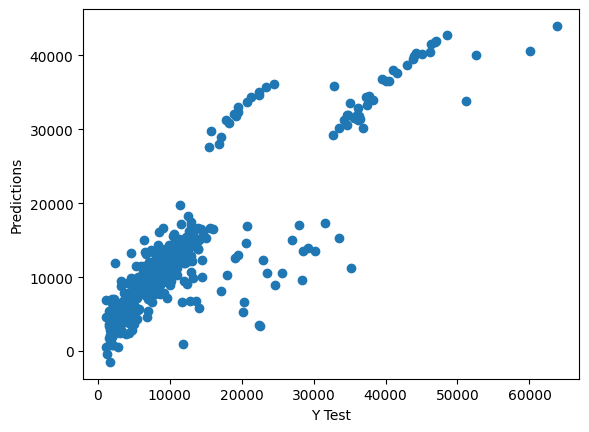

In [33]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

<Axes: xlabel='charges'>

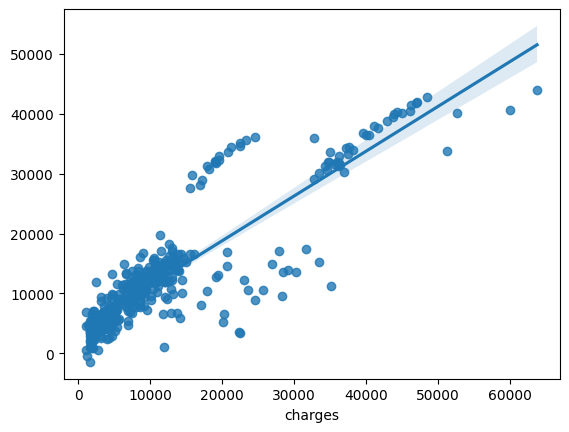

In [34]:
sns.regplot(x = y_test, y = predictions, data = [y_test,predictions])

In [35]:
# Verificando a variação dos dados quando tratamos outliers para gerar uma melhora nas métricas
X = df.loc[:, ['age','bmi','smoker']]
y = df.iloc[:,-1]

In [41]:
X

,age,bmi,smoker
0,19,27.900,1.0
1,18,33.770,0.0
2,28,33.000,0.0
3,33,22.705,0.0
4,32,28.880,0.0
...,...,...,...
1333,50,30.970,0.0
1334,18,31.920,0.0
1335,18,36.850,0.0
1336,21,25.800,0.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=101)

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
predictions = lr.predict(X_test)

In [40]:
import sklearn.metrics as sm
print('Root Mean Square Error: ',round(np.sqrt(np.mean(predictions -y_test)**2),2))
print('Mean Square Error:', round(sm.mean_squared_error(y_test, predictions ),2))
print('Mean Absolut Error:', round(sm.mean_absolute_error(y_test, predictions ),2))
print('Median Absolut Error:', round(sm.median_absolute_error(y_test, predictions ),2))
print('Explain Variance Score:', round(sm.explained_variance_score(y_test, predictions)*100,2))
print('R2 score:', round(sm.r2_score(y_test, predictions)*100,2))

Root Mean Square Error:  567.45
Mean Square Error: 35916479.92
Mean Absolut Error: 4180.76
Median Absolut Error: 2891.29
Explain Variance Score: 75.74
R2 score: 75.52
